In [62]:
import cv2

image = cv2.imread("original.png", cv2.IMREAD_GRAYSCALE)

In [63]:
cv2.imshow("image",image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [64]:
print(image.shape)

(13, 11)


In [65]:
print(image)

[[  0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 255 255   0   0   0   0]
 [  0   0   0   0 255   0   0 255   0   0   0]
 [  0   0   0 255   0   0   0   0 255   0   0]
 [  0   0   0 255   0   0   0   0 255   0   0]
 [  0   0   0 255   0   0   0   0 255   0   0]
 [  0   0   0 255   0   0   0   0 255   0   0]
 [  0   0   0 255   0   0   0   0 255   0   0]
 [  0   0   0 255   0   0   0   0 255   0   0]
 [  0   0   0 255   0   0   0   0 255   0   0]
 [  0   0   0   0 255   0   0   0 255   0   0]
 [  0   0   0   0 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0]]


In [66]:
type(image)

numpy.ndarray

In [67]:
import numpy


In [68]:
print("Data type = {}\n".format(image.dtype))
print("Object type = {}\n".format(type(image)))
print("Image Dimensions = {}\n".format(image.shape))

Data type = uint8

Object type = <class 'numpy.ndarray'>

Image Dimensions = (13, 11)



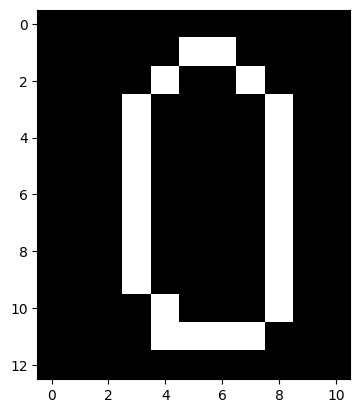

In [69]:
import matplotlib.pyplot as plt
plt.imshow(image, cmap='gray')
plt.show()

In [81]:
print(image[10,4])

255


## Detecting Contour

In [100]:
import numpy as np

def find_contours(binary_img):
    height, width = binary_img.shape
    contours = []

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            if binary_img[i, j] == 255:
                # 8 Directions
                neighbors = [
                    binary_img[i-1, j],     # top
                    binary_img[i+1, j],     # bottom
                    binary_img[i, j-1],     # left
                    binary_img[i, j+1],     # right
                    binary_img[i-1, j-1],   # top-left
                    binary_img[i-1, j+1],   # top-right
                    binary_img[i+1, j-1],   # bottom-left
                    binary_img[i+1, j+1]    # bottom-right
                ]
    
                if any(n == 0 for n in neighbors):  # edge of a shape
                    contours.append((i, j))
    return contours

In [101]:
contour = find_contours(image)
print(contour)
print(len(contour))

[(1, 5), (1, 6), (2, 4), (2, 7), (3, 3), (3, 8), (4, 3), (4, 8), (5, 3), (5, 8), (6, 3), (6, 8), (7, 3), (7, 8), (8, 3), (8, 8), (9, 3), (9, 8), (10, 4), (10, 8), (11, 4), (11, 5), (11, 6), (11, 7)]
24


## Finding Number of Shapes

In [133]:
import numpy as np

def count_shapes(img):
    height, width = img.shape
    visited = np.zeros((height,width))
    shape_count = 0

    def dfs(i, j):
        stack = [(i, j)]
        while stack:
            x, y = stack.pop()
            if (img[x, y] == 255 and not visited[x, y]):
                visited[x, y] = True
                # 8-connected pixel
                for x1 in [-1, 0, 1]:
                    for y1 in [-1, 0, 1]:
                        if x1 != 0 or y1 != 0:
                            stack.append((x + x1, y + y1))

    for i in range(height):
        for j in range(width):
            if img[i, j] == 255 and not visited[i, j]:
                dfs(i, j)
                shape_count += 1

    return shape_count


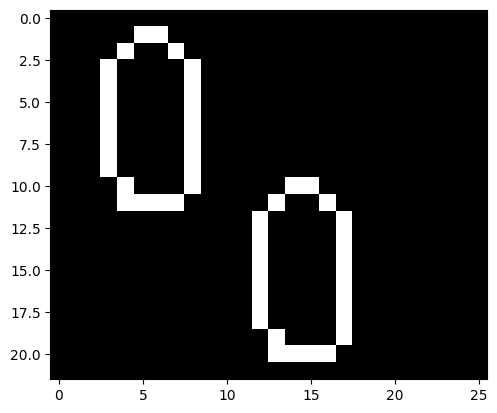

In [136]:
img2 = cv2.imread("2.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(img2,'gray')
plt.show()

In [134]:
print(count_shapes(img2))

2


# Using Absoulute and Adaptive Threshold

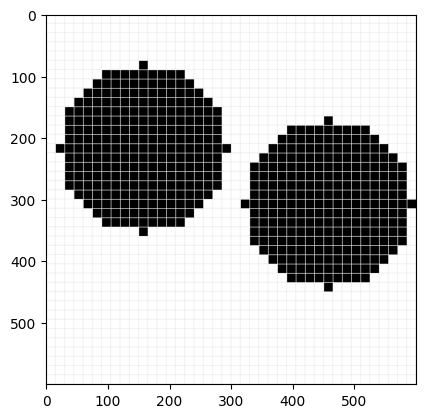

In [143]:
img3 = cv2.imread("download (1).png",cv2.IMREAD_GRAYSCALE)
plt.imshow(img3,"gray")
plt.show()

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


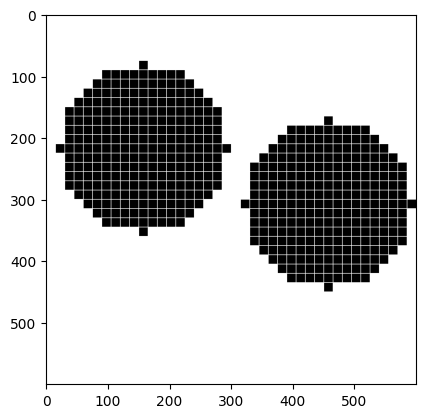

In [153]:
_,abs_threshold = cv2.threshold(img3,0,255,cv2.THRESH_BINARY)
plt.imshow(abs_threshold,"gray")
plt.show()

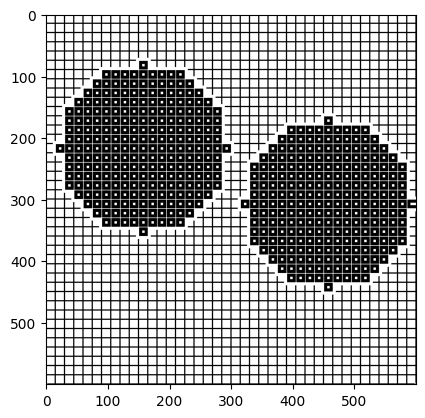

In [165]:
thresh_adapt = cv2.adaptiveThreshold(
    img3, 255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,blockSize=11,C=2
)
plt.imshow(thresh_adapt,"gray")
plt.show()

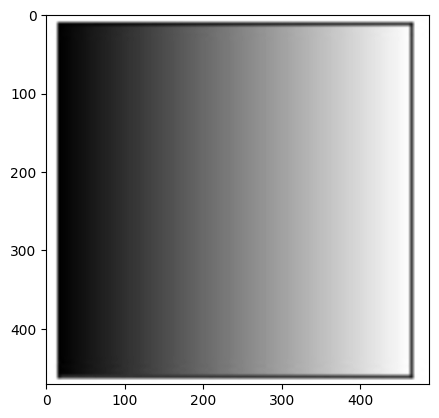

In [161]:
img_t = cv2.imread("threshold.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(img_t,"gray")
plt.show()

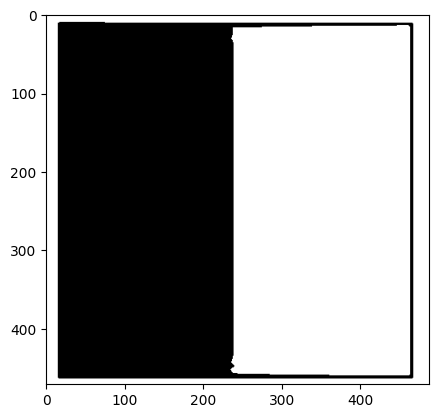

In [169]:
_,abs_threshold = cv2.threshold(img_t,125,255,cv2.THRESH_BINARY)
plt.imshow(abs_threshold,"gray")
plt.show()

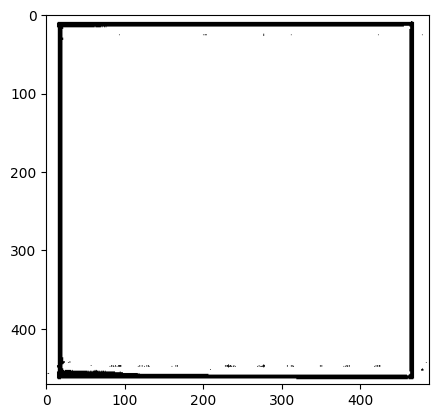

In [167]:
thresh_adapt = cv2.adaptiveThreshold(
    img_t, 255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,blockSize=11,C=2
)
plt.imshow(thresh_adapt,"gray")
plt.show()